In [1]:
enhancer_annotation_FACS = read.csv("~/Desktop/Divya/Thesis/enhancers/enhancer_annotation_FACS.csv")

In [2]:
FACS_prop = read.csv("~/Desktop/Divya/Thesis/enhancers/FACS_prop.csv")

In [3]:
head(FACS_prop)

,gene,X1,X2,Xins,total,X1.prop,X2.prop,Xins.prop,Rink.ID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,MSTRG.1,36.1910557,25.270065,54.6278230,116.088943,0.3117528,0.2176785,0.4705687,SMESG000026673.1
2,MSTRG.10,1.2133136,1.256480,0.3850042,2.854797,0.4250087,0.4401292,0.1348622,MSTRG.10
3,MSTRG.100,13.1669391,22.418585,39.2628785,74.848402,0.1759148,0.2995199,0.5245654,SMESG000026500.1
4,MSTRG.1000,11.0948350,6.709955,6.7263050,24.531095,0.4522764,0.2735286,0.2741951,SMESG000000245.1
5,MSTRG.10000,18.6319518,49.453499,49.3719526,117.457403,0.1586273,0.4210335,0.4203392,SMESG000030021.1
6,MSTRG.10001,0.4793456,1.723136,0.0000000,2.202482,0.2176388,0.7823612,0.0000000,SMESG000030021.1


In [4]:
df = data.frame(x1prop = c(FACS_prop$X1.prop, subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "chip")$X1.prop,
                subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k27ac")$X1.prop,
                        subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k4me1")$X1.prop))

In [5]:
type = c(rep("All", length(FACS_prop$X1.prop)), rep("Both", length(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "chip")$X1.prop)),
                        rep("H3K27ac", length(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k27ac")$X1.prop)),
                        rep("H3K4me1", length(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k4me1")$X1.prop))
        )
df$type = type

Loading required package: ggplot2

Warning message:
“Removed 678 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 678 rows containing missing values (geom_point).”


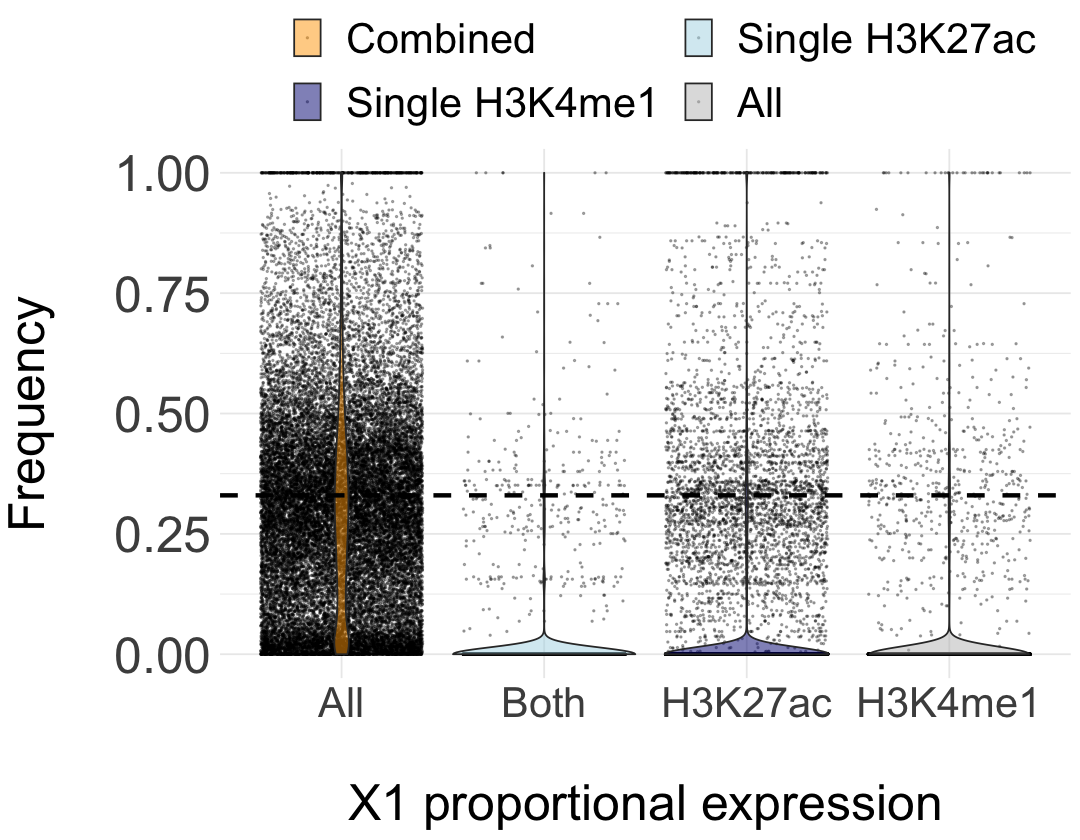

In [6]:
library(ggpubr)
options(repr.plot.width = 9, repr.plot.height = 7)
my_comparisons = list( c("chip", "k27ac"), c("k27ac", "k4me1"), c("chip", "k4me1"))
p = ggplot(df, aes(x=type, y=x1prop, fill=type)) +geom_jitter(size=0.3, alpha=0.3) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_fill_manual(name=" ", labels=c("Combined", "Single H3K27ac", "Single H3K4me1", "All"), values=c("orange", "lightblue", "navyblue", "grey"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="top")
p = p + xlab("\nX1 proportional expression")+ylab("Frequency\n")
p = p + guides(fill=guide_legend(nrow=2,byrow=TRUE))
#p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=35), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
#p = p + scale_fill_manual(name=" ", values=c("navyblue", "#2B83BA", "orange"))
#p = p + scale_x_discrete(labels=c("Combined", "Single H3K27ac", "Single H3K4me1"))
#p = p + xlab("") + ylab("log2 fold change lpt(RNAi)\nH3K4me1\n")+stat_compare_means(comparisons = my_comparisons, size=8)
#p = p + scale_y_continuous(trans="log10")+stat_compare_means(label.y = 6.2, label.x=2.2, size=10)+stat_compare_means(comparisons = my_comparisons, size=8)
p = p + geom_hline(yintercept=0.33, linetype="dashed", size=1.25)
p

In [7]:
df = data.frame(x1prop = c(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "chip")$distanceToTSS,
                subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k27ac")$distanceToTSS,
                        subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k4me1")$distanceToTSS))

In [8]:
type = c(rep("Both", length(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "chip")$distanceToTSS)),
                        rep("H3K27ac", length(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k27ac")$distanceToTSS)),
                        rep("H3K4me1", length(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$Type == "k4me1")$distanceToTSS))
        )
df$type = type

In [9]:
library(ggplot2)
options(repr.plot.width = 9, repr.plot.height = 7)
p = ggplot(df, aes(x=abs(x1prop), fill=type))+geom_histogram(bins=40)
p = p + scale_fill_manual(name=" ", labels=c("Both", "H3K27ac", "H3K4me1"), values=c("#00AFBB", "#E7B800", "#FC4E07"))
p = p + theme(plot.title = element_text(hjust = 0.5),
              title=element_text(size=16),
              axis.text.y=element_text(size=16),
              axis.text.x=element_text(size=16),
              axis.title=element_text(size=16),
              legend.title=element_text(size=20),
              legend.text=element_text(size=20),
              legend.position = "top",
              axis.title.x = element_text(size = 22),
              axis.title.y = element_text(size = 22),
              plot.margin = margin(0, 0, 0, 1, "cm"))
plt1 = p + xlab("\nDistance to TSS (bp)")+ylab("Frequency\n")+xlim(0,50000)
#p = p + geom_vline(xintercept=10, col="black", size=1.2, linetype="dashed")
ggsave("en.pdf", plt1)

Saving 7 x 7 in image

Warning message:
“Removed 1441 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


Warning message:
“Removed 1441 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


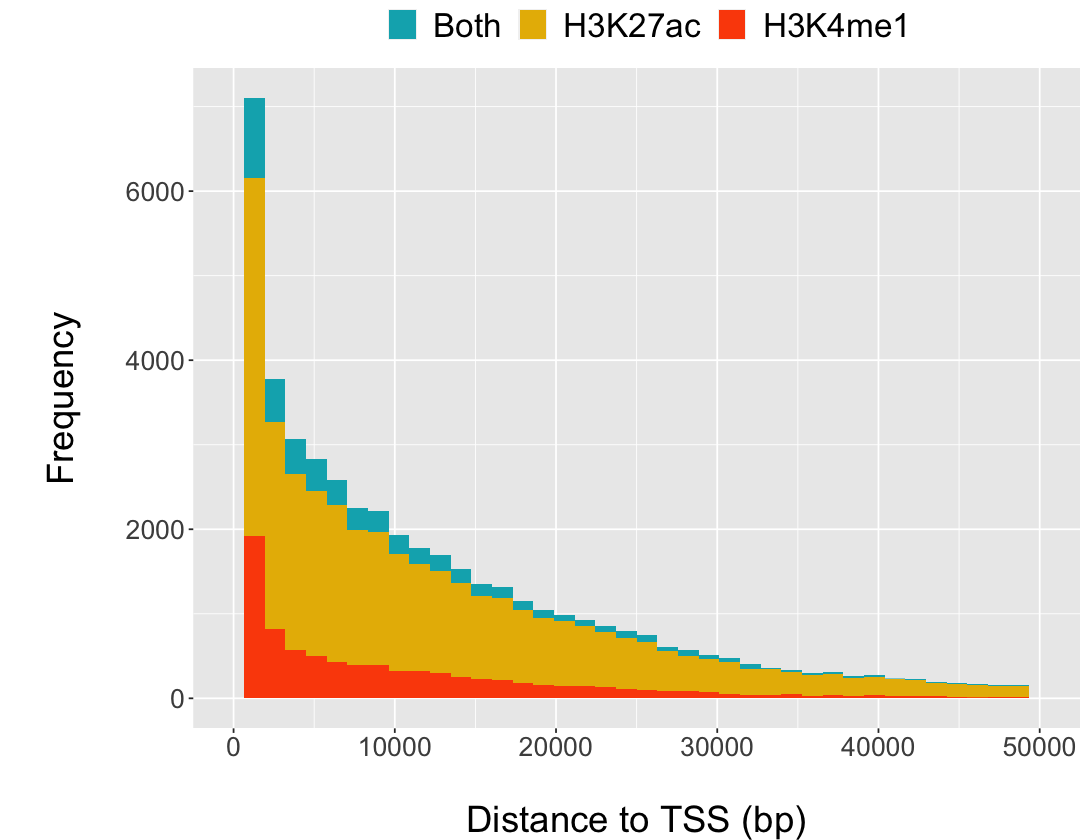

In [10]:
plt1

In [11]:
fs = 16
library(ggpubr)
options(repr.plot.width = 9, repr.plot.height = 7)
plt2=ggviolin(df, x = "type", y = "x1prop",
             fill="type", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             width=0.9,
             xlab="", ylab="Frequency\n",
             legend.title = "",
             legend = "top",
             font.main = fs,
             font.submain = fs,
             font.caption = fs,
             font.legend = 20,
             font.y = 22,
             font.label = list(size = fs, color = "black"))
plt2 = plt2 + theme(axis.text.x = element_text(size=fs), axis.text.y = element_text(size=fs)) + ylim(0, 60000)
ggsave("violin.pdf", plt2)

Saving 7 x 7 in image

Warning message:
“Removed 16140 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 193 rows containing missing values (geom_violin).”


Warning message:
“Removed 16140 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 193 rows containing missing values (geom_violin).”


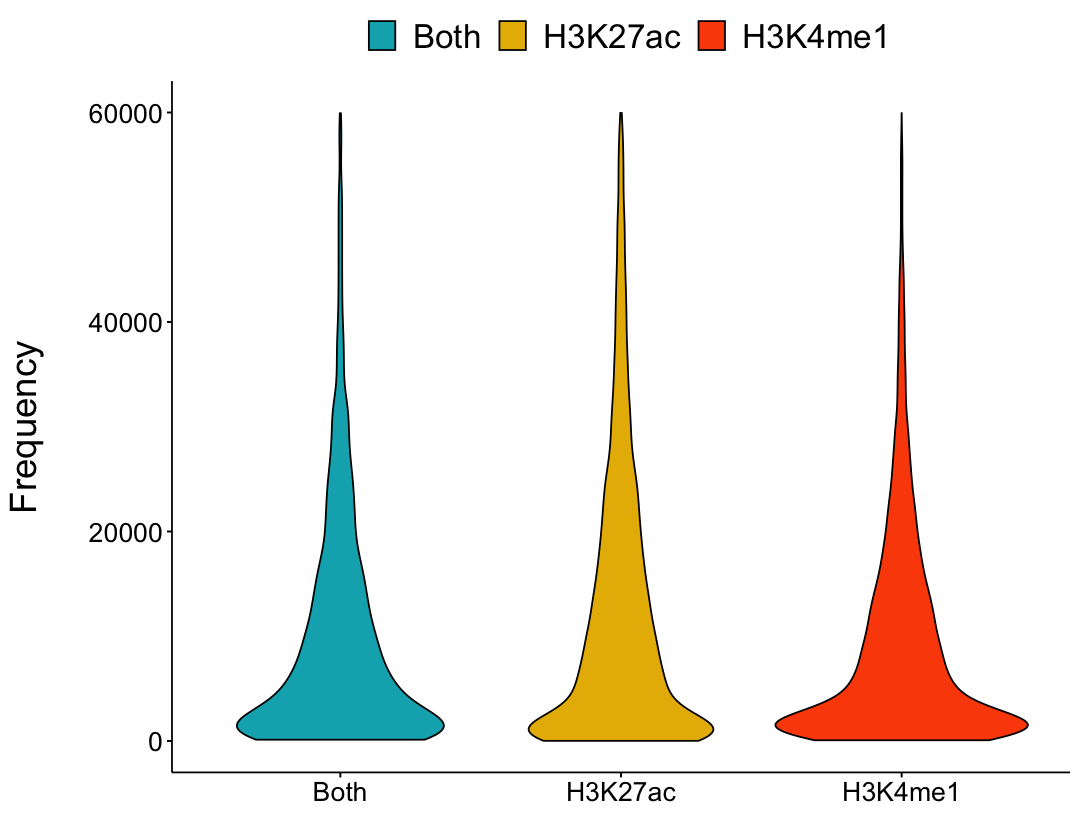

In [12]:
plt2